# Projection of political actors onto a scale of pro- vs anti-EU

In [587]:
# Make sure politician2vec is up to date
#%pip uninstall politician2vec -y
#%pip install git+ssh://git@github.com/mathiasbruun/politician2vec.git

# Make sure to auto-reload politician2vec in case there are remote changes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [779]:
# Imports
from politician2vec import Politician2Vec
from politician2vec.utils import *
import pickle
import pandas as pd
import numpy as np
# import multiprocessing
# available_workers = multiprocessing.cpu_count()
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d import Axes3D
import umap
import umap.plot
from bokeh.models import Label, LabelSet, ColumnDataSource
umap.plot.output_notebook(hide_banner=True)
from adjustText import adjust_text

## Data

In [1917]:
# Specify path to preprocessed dataset
test_data_path = 'data/clean/preprocessed_docs_2015_low.p'

parl_data = pd.read_pickle(test_data_path).query("party not in ['SIU', 'NQ', 'JF', 'SP', 'M', 'DD', 'UFG', 'KD']")
parl_data.shape

(156448, 6)

In [1918]:
grouped_docs = parl_data.groupby(['full_name', 'party'])['doc'].apply('. '.join).reset_index()
docs = [doc for doc in grouped_docs.doc]
parties = np.array([party for party in grouped_docs.party])

In [1919]:
# Load embedding
model_path = 'embedding_models/fastlearn_2015_low.txt'
pol2vec_model, doc2vec_model = load_politician2vec_from_txt(model_path)

Loading Politician2Vec model...
Retrieving document embedding...
All done!


In [1920]:
party_labels = {
   0: 'Socialdemokratiet',
   1: 'Venstre',
   2: 'Dansk_Folkeparti',
   3: 'Enhedslisten',
   4: 'Radikale Venstre',
   5: 'SF',
   6: 'Konservative',
   7: 'Liberal_Alliance',
   8: 'UFG',
   9: 'Alternativet',
   10: 'Danmarksdemokraterne',
   11: 'Nye Borgerlige',
   12: 'Frie Grønne',
   13: 'Moderaterne',
   14: 'Kristendemokraterne'
}

In [1921]:
colormap = { # TODO: COLLECT EVERYTHING IN ONE DICT/FRAME
    'S': '#C8042C',
    'V': '#1A4289',
    'DF': '#265BA4',
    'EL': '#BF2850',
    'SF': '#B42D27',
    'KF': '#24573E',
    'RV': '#D82E8A',
    'LA': '#E7B657',
    'ALT': '#75FB4C',
    'NB': '#1E4B57',
    'KD': '#566197',
    'FG': '#E4F04E',
    'DD': '#3470BC',
    'M': '#7A308B',
    'SIU': 'lightgrey',
    'UFG': 'lightgrey'
}

In [1922]:
party_df = get_doc_party_df(
    pol2vec_model,
    no_substantive_parties = 19,
    snippets = True
)

party_df['party'] = parties
party_df['color'] = party_df['party'].map(colormap)
cmap = party_df[['snippet', 'color']].set_index('snippet').to_dict()
party_df['full_name'] = grouped_docs['full_name']

party_df['rank'] = party_df['party'].map(party_df['party'].value_counts())
party_df.loc[party_df['party'] == 'KF', 'rank'] = 16 # necessary due to slight inconsistency in the order in which parties are output... # TODO: FIX THIS

party_labels = party_df.drop_duplicates(keep = 'first', subset = 'party').sort_values(by='rank', ascending=False)

partyvecs = pol2vec_model.party_vectors
partylabels = pd.DataFrame(party_labels['party'])

party_labels

party sizes before filtering (party 19 is "Other"):

[[ 0 54]
 [ 1 47]
 [ 2 37]
 [ 3 18]
 [ 4 16]
 [ 5 16]
 [ 6 15]
 [ 7 13]
 [ 8 11]
 [ 9  4]
 [10  3]]


doc party                                            snippet    color  \
2      2     S  tak for ordet først og fremmest vil jeg sige t...  #C8042C   
6      6     V  tak for ordet nu har vi jo talt rigtig meget o...  #1A4289   
0      0    DF  tak for det jeg er lidt forvirret på et højere...  #265BA4   
32    32    EL  tak for det jeg vil gerne spørge ordføreren om...  #BF2850   
9      9    SF  tak for det vi er flere her der har svære navn...  #B42D27   
17    17    KF  tak for det tak for en fin ordførertale det da...  #24573E   
4      4    RV  tak for en rigtig god tale det var også godt d...  #D82E8A   
1      1    LA  tak for det og tak for den fine udtale af efte...  #E7B657   
28    28   ALT  tak for det nu sagde ordføreren i sin ordfører...  #75FB4C   
113  113    NB  jeg skal prøve at inddrage hr søren pape pouls...  #1E4B57   
200  200    FG  tak for ordet formand kære statsminister i sid...  #E4F04E   

                     full_name  rank  
2              Anders Kronborg    55  
6       Anne Honoré Østergaard    47  
0              Alex Ahrendtsen    37  
32              Christian Juhl    18  
9    Anne Valentina Berthelsen    16  
17            Birgitte Bergman    16  
4            Andreas Steenberg    15  
1              Alex Vanopslagh    13  
28    Carolina Magdalene Maier    11  
113        Lars Boje Mathiesen     4  
200          Sikandar Siddique     3

In [1923]:
inspect_party(pol2vec_model, 4, 10)

--- TOP 50 WORDS ---
 ['sammen sf' 'sf sf' 'sf mener' 'sf heller' 'sf enige' 'sf klar' 'sf del'
 'høre sf' 'hvorfor sf' 'glade sf' 'sf ser' 'tvivl sf' 'sf enhedslisten'
 'forslag sf' 'spørge sf' 'afgørende sf' 'både sf' 'sf kæmpe' 'sf altid'
 'bakker sfs' 'radikale sf' 'enhedslisten sf' 'håber sf' 'mener sf'
 'sf bakker' 'enige sf' 'sf enig' 'sf længe' 'sf ønsker' 'sf stemme'
 'derfor enormt' 'tænker særlig' 'støtter sf' 'sf radikale' 'gode skridt'
 'sfs stemmer' 'tak sf' 'sf tænkt' 'behov mere' 'sf sidder'
 'overdreven brug' 'deler sf' 'venstre sf' 'sfs mening' 'spørge sfs'
 'sf gerne' 'sf forslaget' 'sf socialdemokratiet' 'forslaget sf'
 'sf lægger'] 

--- TOP 10 DOCS. SUBSTRING QUERY: None (n = 10) ---
 ['tak at afgive en vælgererklæring er bindende og en borger kan kun afgive én vælgererklæring derfor giver det rigtig god mening at man ikke kan omgå den betænkningstid som loven foreskriver desværre opstod der forud for det seneste folketingsvalg en praksis hvor mindst to nye partie

In [1924]:
combined_hover = pd.concat([party_df, partylabels]).reset_index(drop=True)
combined_hover['color'] = combined_hover['color'].fillna('black')
combined_hover

doc party                                            snippet    color  \
0    0.0    DF  tak for det jeg er lidt forvirret på et højere...  #265BA4   
1    1.0    LA  tak for det og tak for den fine udtale af efte...  #E7B657   
2    2.0     S  tak for ordet først og fremmest vil jeg sige t...  #C8042C   
3    3.0    LA  først og fremmest skal man vel ønske færøerne ...  #E7B657   
4    4.0    RV  tak for en rigtig god tale det var også godt d...  #D82E8A   
..   ...   ...                                                ...      ...   
240  NaN    RV                                                NaN    black   
241  NaN    LA                                                NaN    black   
242  NaN   ALT                                                NaN    black   
243  NaN    NB                                                NaN    black   
244  NaN    FG                                                NaN    black   

             full_name  rank  
0      Alex Ahrendtsen  37.0  
1      Alex Vanopslagh  13.0  
2      Anders Kronborg  55.0  
3     Anders Samuelsen  13.0  
4    Andreas Steenberg  15.0  
..                 ...   ...  
240                NaN   NaN  
241                NaN   NaN  
242                NaN   NaN  
243                NaN   NaN  
244                NaN   NaN  

[245 rows x 6 columns]

## Construction of scale

In [1925]:
# Arithmetic mean of input vectors
def mean_vec(vecs):
    return np.mean(vecs, axis=0)

# manually implement cosine similarity between two vectors,
# since phrases are not added to the internal doc2vec model...
# see modellin noteboook for more details
def calc_cos_sim(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# get vectors for input word
def get_vec(word):
    idx = pol2vec_model.word_indexes[word]
    vec = pol2vec_model.word_vectors[idx]
    
    return vec

# Define function that takes two words (or n-grams),
# retrieves the corresponding vectors, and returns the cosine similarity
def get_cos_sim(input_words):
    idcs = [pol2vec_model.word_indexes[word] for word in input_words]
    vec1, vec2 = [pol2vec_model.word_vectors[idx] for idx in idcs]
    
    return calc_cos_sim(vec1, vec2)

In [1926]:
from itertools import combinations
from tqdm.notebook import tqdm

class Subdimension:
    def __init__(self, present_words, absent_words):
        self.words = {'present': present_words, 'absent': absent_words}
        self.vecs = {'present': [get_vec(word) for word in present_words], 'absent': [get_vec(word) for word in absent_words]}
    
    def add_words(self, words, present = True):
        '''
        Manually add extra words and their vector representations to the subdimension.

        Parameters
        ----------
        words : list
            List of words to add to the subdimension.
        present : bool, optional
            Whether the words belong to the present or absent endpoint of the subdimension, by default True
        '''
        for word in words:
            self._add_word(word, present)
    
    def remove_words(self, words, present = True):
        '''
        Manually remove words and their vector representations from the subdimension.

        Parameters
        ----------
        words : list
            List of words to add to the subdimension.
        present : bool, optional
            Whether the words belong to the present or absent endpoint of the subdimension, by default True
        '''
        for word in words:
            self._remove_word(word, present)

    # Backend/helper functions below
    def _add_word(self, word, present = True): # TODO: Make it impossible to add the same word twice...
        self.words['present' if present else 'absent'].append(word)
        self.vecs['present' if present else 'absent'].append(self.get_vec(word))

    def _remove_word(self, word, present = True):
        remove_idx = self.words['present' if present else 'absent'].index(word)
        self.words['present' if present else 'absent'].remove(word)
        del self.vecs['present' if present else 'absent'][remove_idx]

    def calc_subdim_vecs(self):
        '''
        Return the arithmetic mean of both the "present" and the "absent"
        word sets (i.e. construct the endpoints of the subdimension).
        '''
        #return Politician2Vec._l2_normalize(mean_vec(self.vecs['present'])), Politician2Vec._l2_normalize(mean_vec(self.vecs['absent']))
        return mean_vec(self.vecs['present']), mean_vec(self.vecs['absent']) # TODO: Figure out whether or not to normalise!
    
    def optimise_subdim(self, present=True, min_size=2, max_size=None, replace=True):
        '''
        Optimise the subdimension by finding the word set that maximises the average cosine similarity

        Parameters
        ----------
        present : bool, optional
            Whether to optimise the "present" or "absent" endpoint of the subdimension, by default True
        min_size : int, optional
            Minimum number of words in the word set, by default 2
        max_size : int, optional
            Maximum number of words in the word set, by default None (i.e. no limit)
        replace : bool, optional
            Whether to replace the original word set with the optimised one, by default True

        Returns
        -------
        best_group : list
            The optimised word set.
        best_labels : list
            The corresponding word labels.
        best_sim : float
            The average cosine similarity of the optimal word set.
        '''
        
        best_group, best_labels, best_sim = self.optimise_group_similarity(
            vectors=self.vecs['present' if present else 'absent'],
            labels=self.words['present' if present else 'absent'],
            min_size=min_size,
            max_size=max_size
            )
        
        if replace:
            self.words['present' if present else 'absent'] = best_labels
            self.vecs['present' if present else 'absent'] = best_group
        
        print('Best avg. cosine similarity:', best_sim)
        
        return best_group, best_labels
    
    @staticmethod
    def get_vec(word):
        '''Retrieve the vector representation of a given word from the politician2vec model.'''
        idx = pol2vec_model.word_indexes[word]
        vec = pol2vec_model.word_vectors[idx]

        return vec
    
    @staticmethod
    def mean_vec(vecs):
        return np.mean(vecs, axis=1)

    @staticmethod
    def group_cosine_similarity(vectors):
        '''
        Calculates the average cosine similarity between all pairs of vectors in a group.

        Parameters
        ----------
        vectors (list): A list of 300-dimensional word vectors.

        Returns
        -------
        float: The average cosine similarity between all pairs of vectors in the group.
       '''

        # calculate the pairwise cosine similarities
        pairwise_sims = []
        for v1, v2 in combinations(vectors, 2):
            sim = calc_cos_sim(v1,v2)
            pairwise_sims.append(sim)

        # calculate the average cosine similarity
        avg_sim = np.mean(pairwise_sims)

        return avg_sim

    def optimise_group_similarity(self, vectors, labels, min_size, max_size):
        '''
        Optimizes the average cosine similarity of a group of vectors byiteratively removing and
        including different combinations.

        Parameters
        ----------
        vectors (list): A list of 300-dimensional word vectors.
        labels (list): A list of labels for the vectors.
        min_size (int): The minimum size of the group to consider. Default is 2.
        max_size (int): The maximum size of the group to consider. Default is None (use all vectors).

        Returns
        -------
        list: The optimized group of vectors that maximizes the average cosine similarity.
        list: The labels of the vectors in the optimized group.
        float: The maximum average cosine similarity achieved by the optimized group.
        '''

        # set max_size to len(vectors) if not specified
        if max_size is None:
            max_size = len(vectors)

        # initialize the best group, labels, and similarity
        best_group = None
        best_labels = None
        best_sim = 0.0

        # iterate over all possible group sizes
        for size in tqdm(range(min_size, max_size+1)):
            
            # iterate over all possible combinations of vectors
            for group_idx in combinations(range(len(vectors)), size):
                
                # get the vectors and labels for the current group
                group = [vectors[i] for i in group_idx]
                group_labels = [labels[i] for i in group_idx]
                
                # calculate the average cosine similarity of the group
                sim = self.group_cosine_similarity(group)
                
                # update the best group, labels, and similarity if a new maximum is found
                if sim > best_sim:
                    best_group = group
                    best_labels = group_labels
                    best_sim = sim

        return best_group, best_labels, round(best_sim, ndigits=3)


In [1927]:
# TODO: Deterministic optimisation procedure or not???

pro_eu_words = [
    'fælles eu-forsvar',
    'fællesskab eu',
    'hjertet eu',
    'kræfter eu',
    'resten eu',
    'samarbejde eu',
    'tilhængere eu',
    'uden eu',
    'andre eu-borgere',
    'union',
    'opgør forsvarsforbeholdet'
    ]

anti_eu_words = [
    'eu tillader',
    'imod eu',
    'krav eu',
    'kritisk eu',
    'magt eu',
    'snævrere union',
    'mindre eu',
    'modstander eu',
    'nede eu',
    'nogen eu-hær',
    'skærpet eu-kurs',
    'udfordre eu',
    'udmeldelse eu',
    'begejstret eu',
    'vores forsvarsforbehold'
    ]


In [1850]:
pol2vec_model.model.wv.most_similar(positive = ['mindsteløn'], topn = 15)

[('mindstelønnen', 0.6060122847557068),
 ('kontanthjælp', 0.4247310161590576),
 ('kontanthjælpen', 0.42329341173171997),
 ('kompensationsgraden', 0.4230390787124634),
 ('kontanthjælpssystem', 0.40384232997894287),
 ('arbejdsmarkedet', 0.39269065856933594),
 ('lønninger', 0.37373220920562744),
 ('konfliktretten', 0.36540305614471436),
 ('løn', 0.36366134881973267),
 ('lønningerne', 0.3588319718837738),
 ('enlig', 0.3499310612678528),
 ('kontanthjælpsloftet', 0.3488530218601227),
 ('arbejdsmarkedsmodel', 0.3352340757846832),
 ('arbejdsmarkedets', 0.3307546377182007),
 ('kontanthjælpsloft', 0.3305499255657196)]

In [1851]:
eu_dimension = Subdimension(
    present_words=pro_eu_words,
    absent_words=anti_eu_words
    )

In [1852]:
print(eu_dimension.words)
print(len(eu_dimension.vecs['present']))

{'present': ['fælles eu-forsvar', 'fællesskab eu', 'hjertet eu', 'kræfter eu', 'resten eu', 'samarbejde eu', 'tilhængere eu', 'uden eu', 'andre eu-borgere', 'union', 'opgør forsvarsforbeholdet'], 'absent': ['eu tillader', 'imod eu', 'krav eu', 'kritisk eu', 'magt eu', 'snævrere union', 'mindre eu', 'modstander eu', 'nede eu', 'nogen eu-hær', 'skærpet eu-kurs', 'udfordre eu', 'udmeldelse eu', 'begejstret eu', 'vores forsvarsforbehold']}
11


In [1853]:
# TODO: Optimise this brute-force algorithm, since it's way too slow for many vecs at once
# Pro:
best_vecs, best_words = eu_dimension.optimise_subdim(present=True, min_size=6, max_size=10, replace=True)
print(best_words)

# Anti:
best_vecs, best_words = eu_dimension.optimise_subdim(present=False, min_size=6, max_size=10, replace=True)
print(best_words)

  0%|          | 0/5 [00:00<?, ?it/s]

Best avg. cosine similarity: 0.755
['fællesskab eu', 'kræfter eu', 'resten eu', 'samarbejde eu', 'uden eu', 'andre eu-borgere']


  0%|          | 0/5 [00:00<?, ?it/s]

Best avg. cosine similarity: 0.766
['imod eu', 'krav eu', 'kritisk eu', 'snævrere union', 'mindre eu', 'udmeldelse eu']


In [1854]:
pro_eu, anti_eu = eu_dimension.calc_subdim_vecs()

eu_axis = pro_eu - anti_eu

## Plotting and validation

In [1855]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib.patheffects as pe
plt.rcParams['figure.dpi'] = 250

# define a funciton that takes a column from df_val and plots it as as sorted bar chart
def plot_bar(df, col, title, xlabel, ylabel, color):
    df = df.sort_values(col, ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(df['Partyabb'], rescale(df[col]), color=df[color])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# define a funciton to plot the same data as a 1-dimensional dot plot
def plot_dot(df, col, title, xlabel, color, jitter=False):
    plt.figure(figsize=(15, 2.5))
    if jitter:
        y_jitter = np.random.normal(scale=0.001, size=len(df[col]))
        plt.scatter(rescale(df[col]), y_jitter, color='white')
    else:
        plt.scatter(rescale(df[col]), np.zeros_like(rescale(df[col])), color=df[color])

    # add party labels
    for i, txt in enumerate(df['Partyabb']):
            plt.text(rescale(df[col])[i], y_jitter[i], txt, ha='center', va='center', fontsize=20, color=df[color][i], weight='bold', path_effects=[pe.withStroke(linewidth=2, foreground='black')])
    
    plt.grid(False)
    plt.box(False)
    plt.yticks([])
    
    plt.axhline(y=0, color='darkgrey', linewidth=1)
    plt.axvline(x=0, color='darkgrey', linewidth=1, linestyle=':')

    plt.ylim(-0.005, 0.005)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

# define a function that takes a variable and rescales it to the range -1 to 1
def rescale(var):
    var = (var - var.min()) / (var.max() - var.min())
    var = 2 * var - 1
    return var

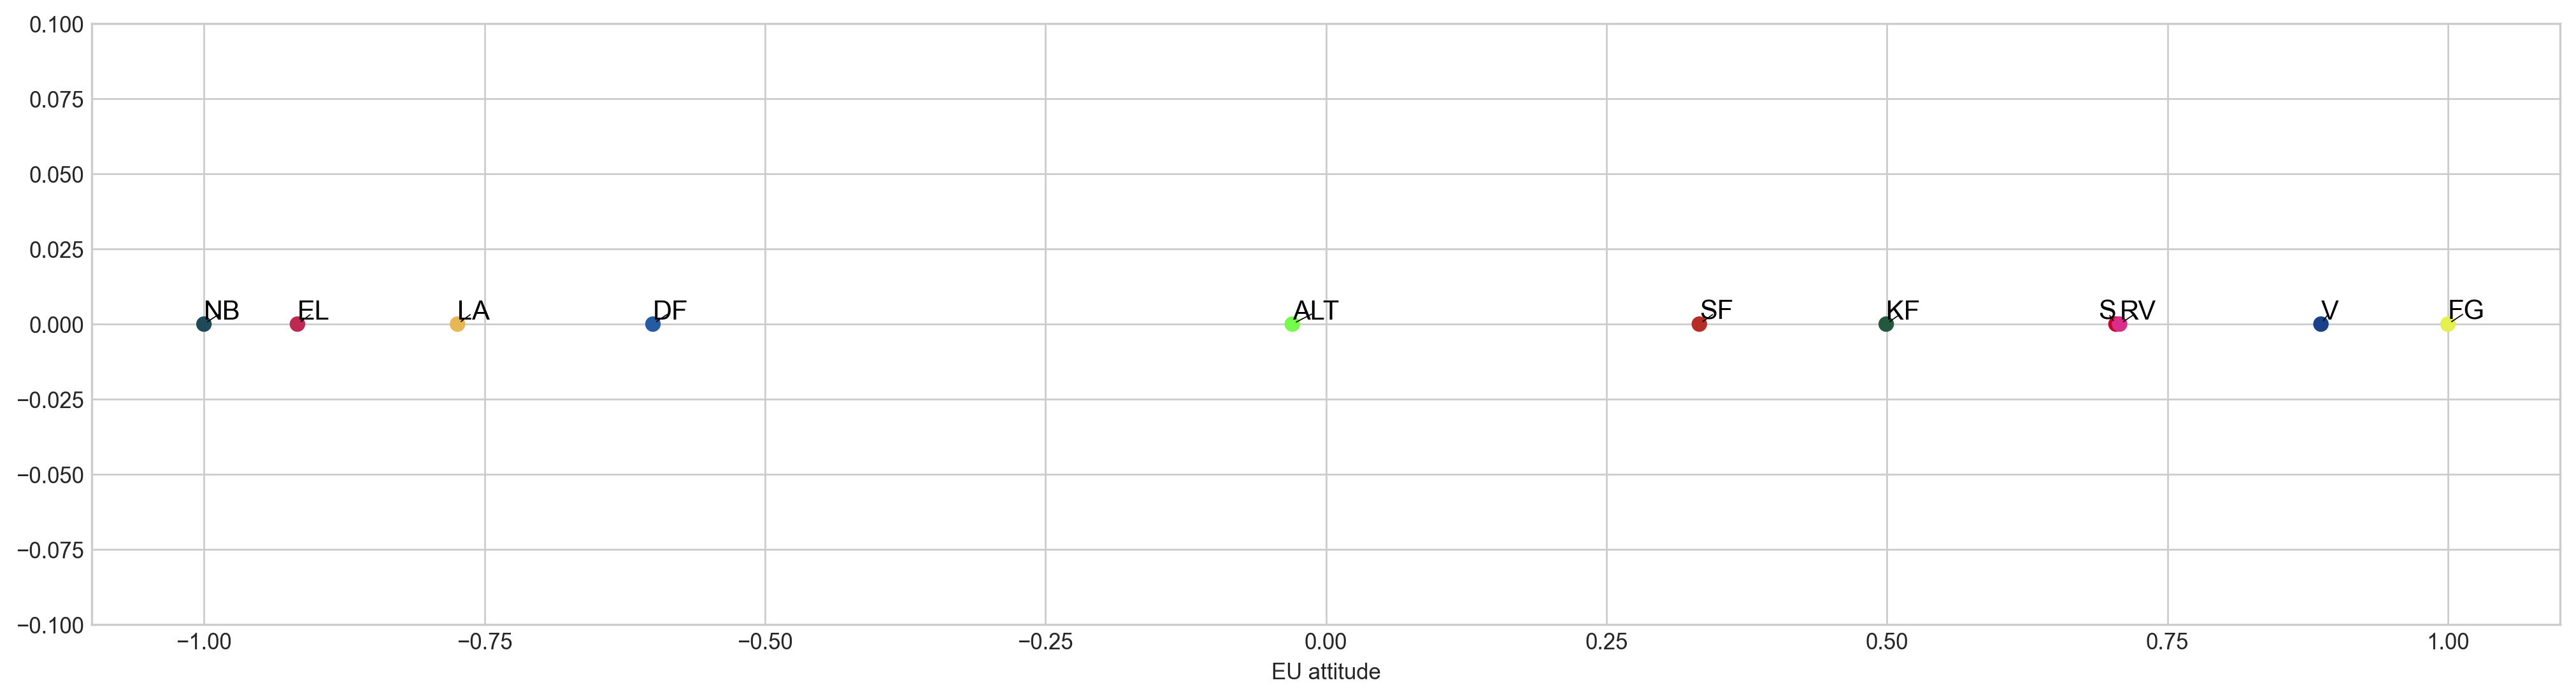

In [1856]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
colorlist = combined_hover.dropna()['color']

# project politicians onto each subdimension
proj_dim = np.dot(pol2vec_model.party_vectors, eu_axis)

# rescale subdim to (-1, 1)
proj_dim = (proj_dim - np.min(proj_dim)) / (np.max(proj_dim) - np.min(proj_dim))*2-1

# create 3x1 subplot
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

# plot projection onto first subdimension
ax.scatter(proj_dim, np.zeros_like(proj_dim), c=party_labels['color'])
ax.set_xlabel('EU attitude')
ax.set_ylim(-0.1, 0.1)

# add party labels to each of the subplots without adjusting text positions
for i, party in enumerate(party_labels['party']):
    ax.text(proj_dim[i], 0, party, color='black', size=12)

# adjust text positions to avoid overlapping
adjust_text([ax.texts[i] for i in range(len(ax.texts))], ax=ax, force_points=0.2, force_text=0.2, expand_points=(1,1), expand_text=(1,1), arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

plt.show()

In [1857]:
parties = ['S', 'RV', 'KF', 'SF', 'DF', 'V', 'EL', 'LA', 'ALT']
gns = [8.1, 8.2, 7.3, 5.9, 2.4, 7.8, 3.5, 6.2, 5.5]
gns = (gns - np.min(gns)) / (np.max(gns) - np.min(gns))*2-1

df_test = pd.DataFrame(zip(parties, gns), columns=['party', 'eu_avg'])

### Expert survey validation

In [1858]:
df_val = pd.read_excel('data/validation_ParlGov.xlsx')[['Partyabb', 'PG_eu_anti_pro']]

In [1859]:
df_plot = df_test.merge(df_val, left_on='party', right_on='Partyabb', how='left')

# rescale PG_eu_anti_pro to (-1, 1)
df_plot['PG_eu'] = (df_plot['PG_eu_anti_pro'] - np.min(df_plot['PG_eu_anti_pro'])) / (np.max(df_plot['PG_eu_anti_pro']) - np.min(df_plot['PG_eu_anti_pro']))*2-1

In [1860]:
df_plot

party    eu_avg Partyabb  PG_eu_anti_pro     PG_eu
0     S  0.965517        S          7.4311  0.602551
1    RV  1.000000       RV          7.8594  0.709229
2    KF  0.689655       KF          7.7791  0.689229
3    SF  0.206897       SF          3.5917 -0.353749
4    DF -1.000000       DF          1.1830 -0.953697
5     V  0.862069        V          9.0268  1.000000
6    EL -0.620690       EL          0.9971 -1.000000
7    LA  0.310345       LA          8.7000  0.918602
8   ALT  0.068966      ALT          6.5000  0.370637

In [1861]:
# map party positions and colours to df_test
df_plot = df_plot.merge(party_labels, on='party', how='outer')[['party', 'eu_avg', 'PG_eu', 'color', 'rank']].sort_values(by='rank', ascending=False).reset_index(drop=True)
df_plot['pos'] = proj_dim

In [1862]:
df_plot

party    eu_avg     PG_eu    color  rank       pos
0      S  0.965517  0.602551  #C8042C    55  0.704165
1      V  0.862069  1.000000  #1A4289    47  0.886846
2     DF -1.000000 -0.953697  #265BA4    37 -0.599830
3     EL -0.620690 -1.000000  #BF2850    18 -0.916677
4     KF  0.689655  0.689229  #24573E    16  0.332813
5     SF  0.206897 -0.353749  #B42D27    16  0.499382
6     RV  1.000000  0.709229  #D82E8A    15  0.707407
7     LA  0.310345  0.918602  #E7B657    13 -0.773988
8    ALT  0.068966  0.370637  #75FB4C    11 -0.029932
9     NB       NaN       NaN  #1E4B57     4 -1.000000
10    FG       NaN       NaN  #E4F04E     3  1.000000

In [1863]:
df_plot = df_plot.dropna()
df_plot['pos'] = (df_plot['pos'] - np.min(df_plot['pos'])) / (np.max(df_plot['pos']) - np.min(df_plot['pos']))*2-1 # rescale after removing NB and FG?

/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1864]:
# TODO: CHECK WTH IS HAPPENING WITH LA AND SF ON HIGH_KF.... – cuz this seems more right?
# df_plot.loc[df_plot['color']=='#B42D27', 'pos'] = -0.841766
# df_plot.loc[df_plot['color']=='#E7B657', 'pos'] = 0.570325

(0.5623187255884396, 0.11502718598013559)


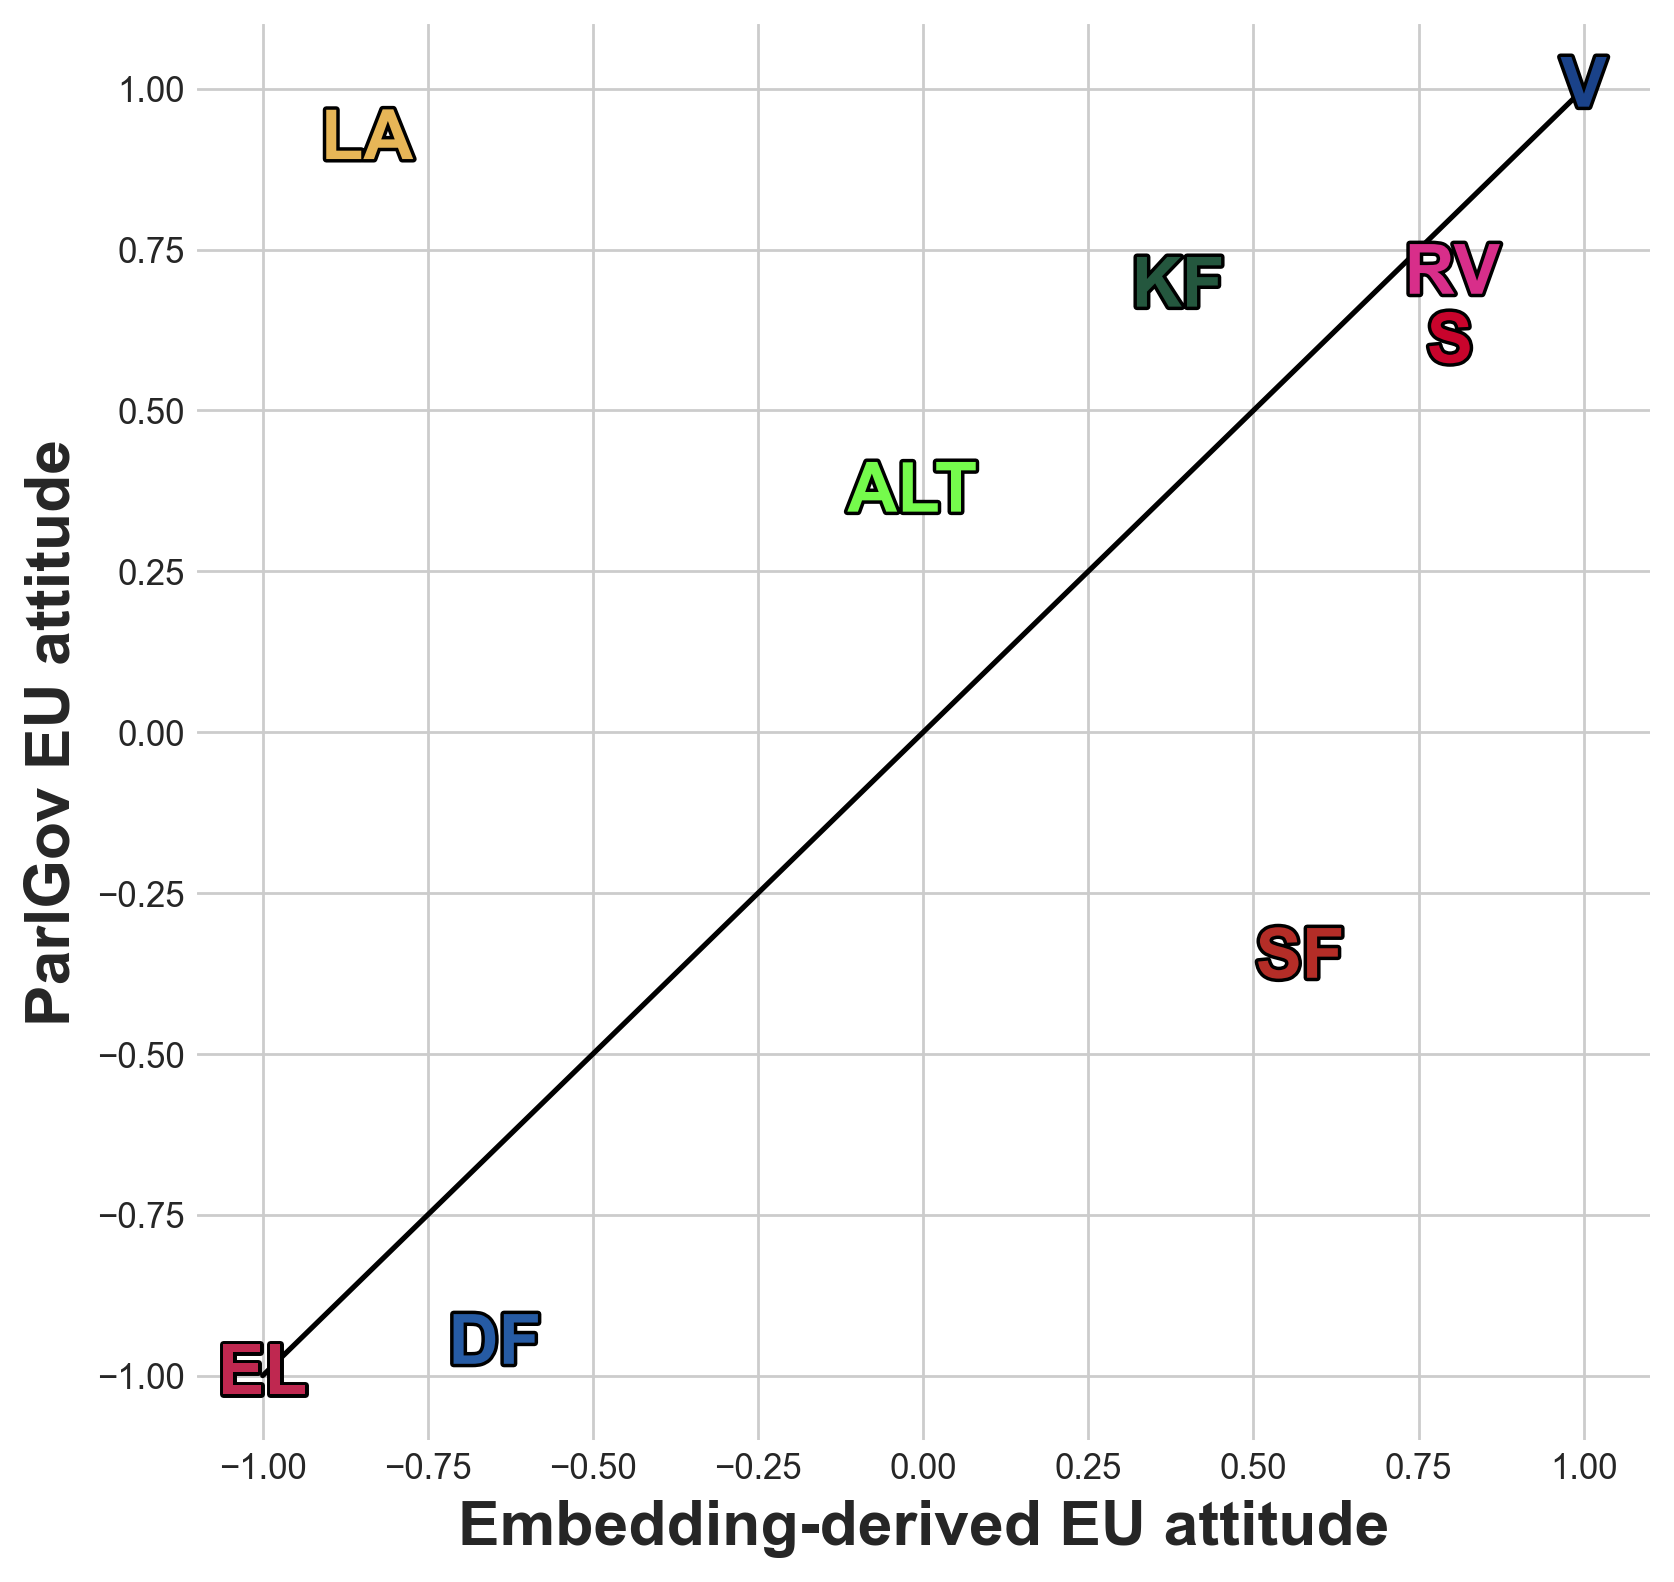

In [1865]:
#comp_metric = 'eu_avg'
comp_metric = 'PG_eu'

# pearson's r of pos and PG_eu
from scipy.stats import pearsonr
print(pearsonr(df_plot['pos'], df_plot[comp_metric]))

# scatter pos and PG_eu
plt.figure(figsize=(7.5, 7.5))
plt.scatter(df_plot['pos'], df_plot[comp_metric], color='none')
plt.xlabel('Embedding-derived EU attitude', weight='bold', size=18)
plt.ylabel('ParlGov EU attitude', weight='bold', size=18)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# draw line from -1,-1 to 1,1
plt.plot([-1, 1], [-1, 1], color='black', linestyle='-')

plt.box(False)

# add party labels
for i, txt in enumerate(df_plot['party']):
    plt.text(
        df_plot['pos'][i],
        df_plot[comp_metric][i],
        txt,
        ha='center',
        va='center',
        fontsize=20,
        color=df_plot['color'][i],
        weight='bold',
        path_effects=[pe.withStroke(linewidth=2, foreground='black')]
        )

plt.show()


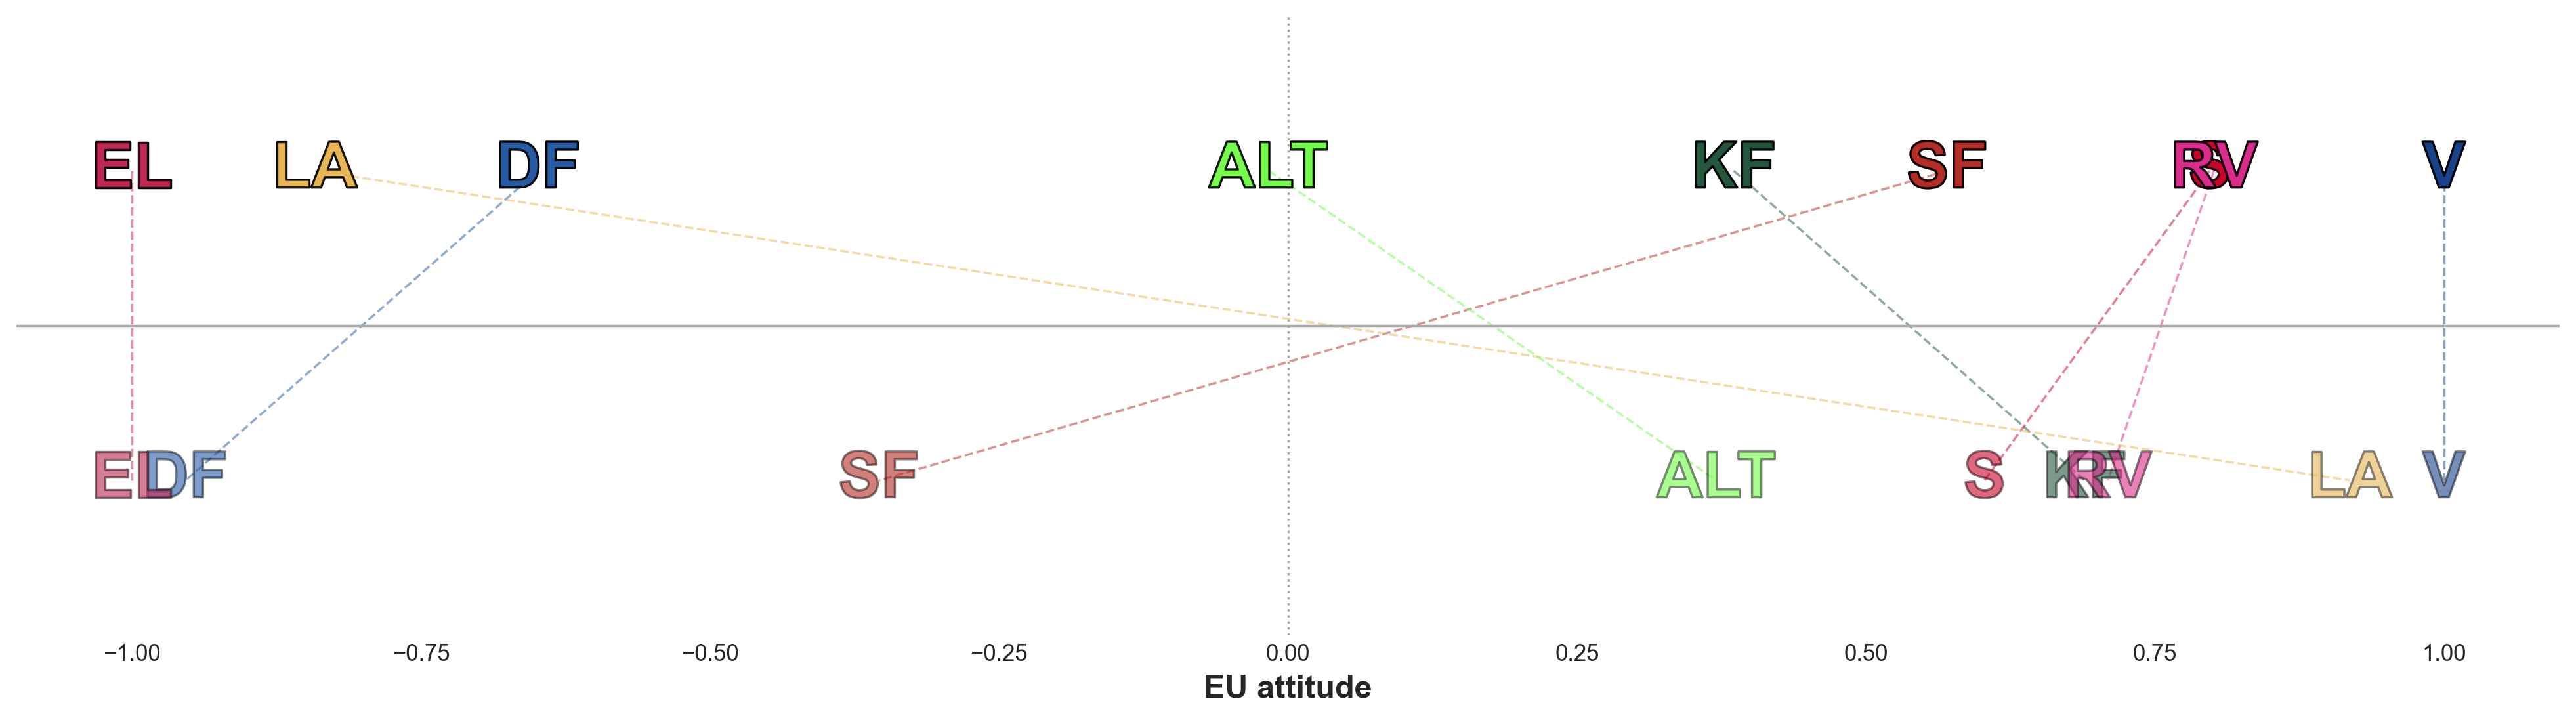

In [1866]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.set_xlabel('EU attitude', size = 14, weight = 'bold')

ax.scatter(df_plot['pos'], np.zeros_like(df_plot['pos']), s=50, alpha=0.75, color='none')
ax.scatter(df_plot[comp_metric], np.zeros_like(df_plot[comp_metric]), s=50, alpha=0.75, color='none')

# # add party labels
for i, txt in enumerate(df_plot['party']):
    ax.text(df_plot['pos'][i], .01, txt, ha='center', va='center', fontsize=28, color=df_plot['color'][i], alpha=.2, weight='bold', path_effects=[pe.withStroke(linewidth=1, foreground='black', alpha=1)])

# # add party labels
for i, txt in enumerate(df_plot['party']):
    ax.text(df_plot[comp_metric][i], -.01, txt, ha='center', va='center', fontsize=28, color=df_plot['color'][i], alpha=.2, weight='bold', path_effects=[pe.withStroke(linewidth=1, foreground='black', alpha=.5)])

# for i, txt in enumerate(df_test['party']):
#     ax.text(rescale(df_test['V4_scale'])[i], rescale(df_test['value'])[i], txt, ha='center', va='center', fontsize=12, color=df_test['color'][i], alpha=1, weight='bold', path_effects=[pe.withStroke(linewidth=2, foreground='black', alpha=1)])

# draw line segment between pos and eu_avg for each party
for i in range(len(df_plot)):
    ax.plot([df_plot['pos'][i], df_plot[comp_metric][i]], [0.01, -0.01], color=df_plot['color'][i], alpha=.5, linewidth=1, linestyle='--')

# add vline to plot
ax.axvline(x=0, color='darkgrey', linestyle=':', linewidth=1)
ax.axhline(y=0, color='darkgrey', linestyle='-', linewidth=1)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_yticks([])
ax.grid(False)

# set ylim
ax.set_ylim(-0.02, 0.02)

# Show the plot
plt.show()

In [1867]:
# Pearson correlation between pos and comp_metric
from scipy.stats import pearsonr
print(pearsonr(df_plot['pos'], df_plot[comp_metric]))

(0.5623187255884396, 0.11502718598013559)


In [1868]:
# count number of documents per party
df_plot['count'] = df_plot['party'].map(parl_data['party'].value_counts(normalize=True))

/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1869]:
# Standard OLS regression of pos and comp_metric
import statsmodels.api as sm
X = df_plot['pos']
y = df_plot[comp_metric]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                  PG_eu   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     3.237
Date:                Tue, 09 May 2023   Prob (F-statistic):              0.115
Time:                        09:28:52   Log-Likelihood:                -8.3425
No. Observations:                   9   AIC:                             20.69
Df Residuals:                       7   BIC:                             21.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1538      0.234      0.657      0.5

In [1870]:
# Conduct WLS regression of pos and comp_metric
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X = df_plot['pos']
X = sm.add_constant(X)

y = df_plot[comp_metric]

mod_wls = sm.WLS(y, X, weights=1/(df_plot['count']))
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                  PG_eu   R-squared:                       0.115
Model:                            WLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.9091
Date:                Tue, 09 May 2023   Prob (F-statistic):              0.372
Time:                        09:28:52   Log-Likelihood:                -8.8018
No. Observations:                   9   AIC:                             21.60
Df Residuals:                       7   BIC:                             22.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2663      0.233      1.144      0.2

/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [1871]:
combined_hover.sort_values(by='rank').head(50)

doc party                                            snippet    color  \
200  200.0    FG  kære statsminister i sidste uge blev opstillin...  #E4F04E   
210  210.0    FG  i går vi selvfølgelig ind for frihed vi vil ge...  #E4F04E   
228  228.0    FG  mit spørgsmål var egentlig sådan lidt enkelt t...  #E4F04E   
177  177.0    NB  har gjort det klart at det nuværende asylsyste...  #1E4B57   
150  150.0    NB  jeg vil starte med at sige at det er en rigtig...  #1E4B57   
181  181.0    NB  ønsker at sænke landbrugsproduktionen for at r...  #1E4B57   
113  113.0    NB  jeg skal prøve at inddrage i noget som han så ...  #1E4B57   
227  227.0   ALT  jeg vil starte med lige at nævne de temaer jeg...  #75FB4C   
87    87.0   ALT  som det allerede er blevet nævnt hænger det he...  #75FB4C   
229  229.0   ALT  jeg vil gerne spørge ordføreren om han overhov...  #75FB4C   
190  190.0   ALT  det er jo altid spændende at høre om partiers ...  #75FB4C   
195  195.0   ALT  jeg har en forestilling om at gerne vil være m...  #75FB4C   
199  199.0   ALT  formand vi befinder os lige nu i demokratiets ...  #75FB4C   
34    34.0   ALT  jeg vil gerne vende tilbage til klimakrisen og...  #75FB4C   
28    28.0   ALT  nu sagde ordføreren i sin ordførertale – og ta...  #75FB4C   
209  209.0   ALT  og tak for talen nu ved jeg at det går meget o...  #75FB4C   
174  174.0   ALT  jeg kunne godt tænke mig at høre ordføreren om...  #75FB4C   
221  221.0   ALT  jeg vil også gøre det kort i fremsættelsen af ...  #75FB4C   
231  231.0    LA  jeg har forstået at der kommer mange emner ind...  #E7B657   
115  115.0    LA  jeg vil selvfølgelig også tilkendegive at støt...  #E7B657   
59    59.0    LA  som afbureaukratiseringsordfører for mit eget ...  #E7B657   
36    36.0    LA  ordføreren sagde i sin tale at hvis vi afskaff...  #E7B657   
3      3.0    LA  først og fremmest skal man vel ønske færøerne ...  #E7B657   
166  166.0    LA  har indgået en aftale med regeringen og om at ...  #E7B657   
201  201.0    LA  danmark er et åbent land og det synes vi også ...  #E7B657   
1      1.0    LA  statsministeren sagde i tirsdags at det simpel...  #E7B657   
84    84.0    LA  det er jo fair nok at man har nogle andre måls...  #E7B657   
29    29.0    LA  også herfra tak til de to ministre for en mege...  #E7B657   
145  145.0    LA  jeg ved jo at er meget optaget af et miljø som...  #E7B657   
143  143.0    LA  i udlændingeudspil »retfærdige grænser for fly...  #E7B657   
118  118.0    LA  forløberen for det her beslutningsforslag er j...  #E7B657   
187  187.0    RV  det drejer sig jo om en omdannelse af retsforb...  #D82E8A   
80    80.0    RV  jeg vil så vende mig mod det udenrigspolitiske...  #D82E8A   
160  160.0    RV  jeg skal bare spørge udlændinge og integration...  #D82E8A   
140  140.0    RV  som det vil fremgå af min ordførertale senere ...  #D82E8A   
133  133.0    RV  l som vi behandler her i dag lov om ændring af...  #D82E8A   
101  101.0    RV  alle har og skal have mulighed for at række ud...  #D82E8A   
102  102.0    RV  på folkemødet i blev jeg rigtig glad da vores ...  #D82E8A   
122  122.0    RV  jeg vil gerne følge op på spørgsmål for dansk ...  #D82E8A   
108  108.0    RV  danmark har været en grøn førernation det har ...  #D82E8A   
8      8.0    RV  som der er redegjort for indeholder lovforslag...  #D82E8A   
65    65.0    RV  jeg har siddet og lyttet lidt til debatten og ...  #D82E8A   
233  233.0    RV  se det der blev sagt til sidst synes jeg var v...  #D82E8A   
4      4.0    RV  det var også godt der kom styr på vandet derop...  #D82E8A   
203  203.0    RV  jeg er meget enig med de foregående ordførere ...  #D82E8A   
206  206.0    RV  nu sagde ordføreren tidligere at i også lytter...  #D82E8A   
191  191.0    SF  vi har jo siden coronakrisen startede set en r...  #B42D27   
70    70.0    SF  i valgkampen var jeg i en del paneldebatter me...  #B42D27   
164  164.0    KF  tak for en god ordførertale jeg bemærkede at d...  #24573E   
161  16

(0.5623187255884396, 0.11502718598013559)


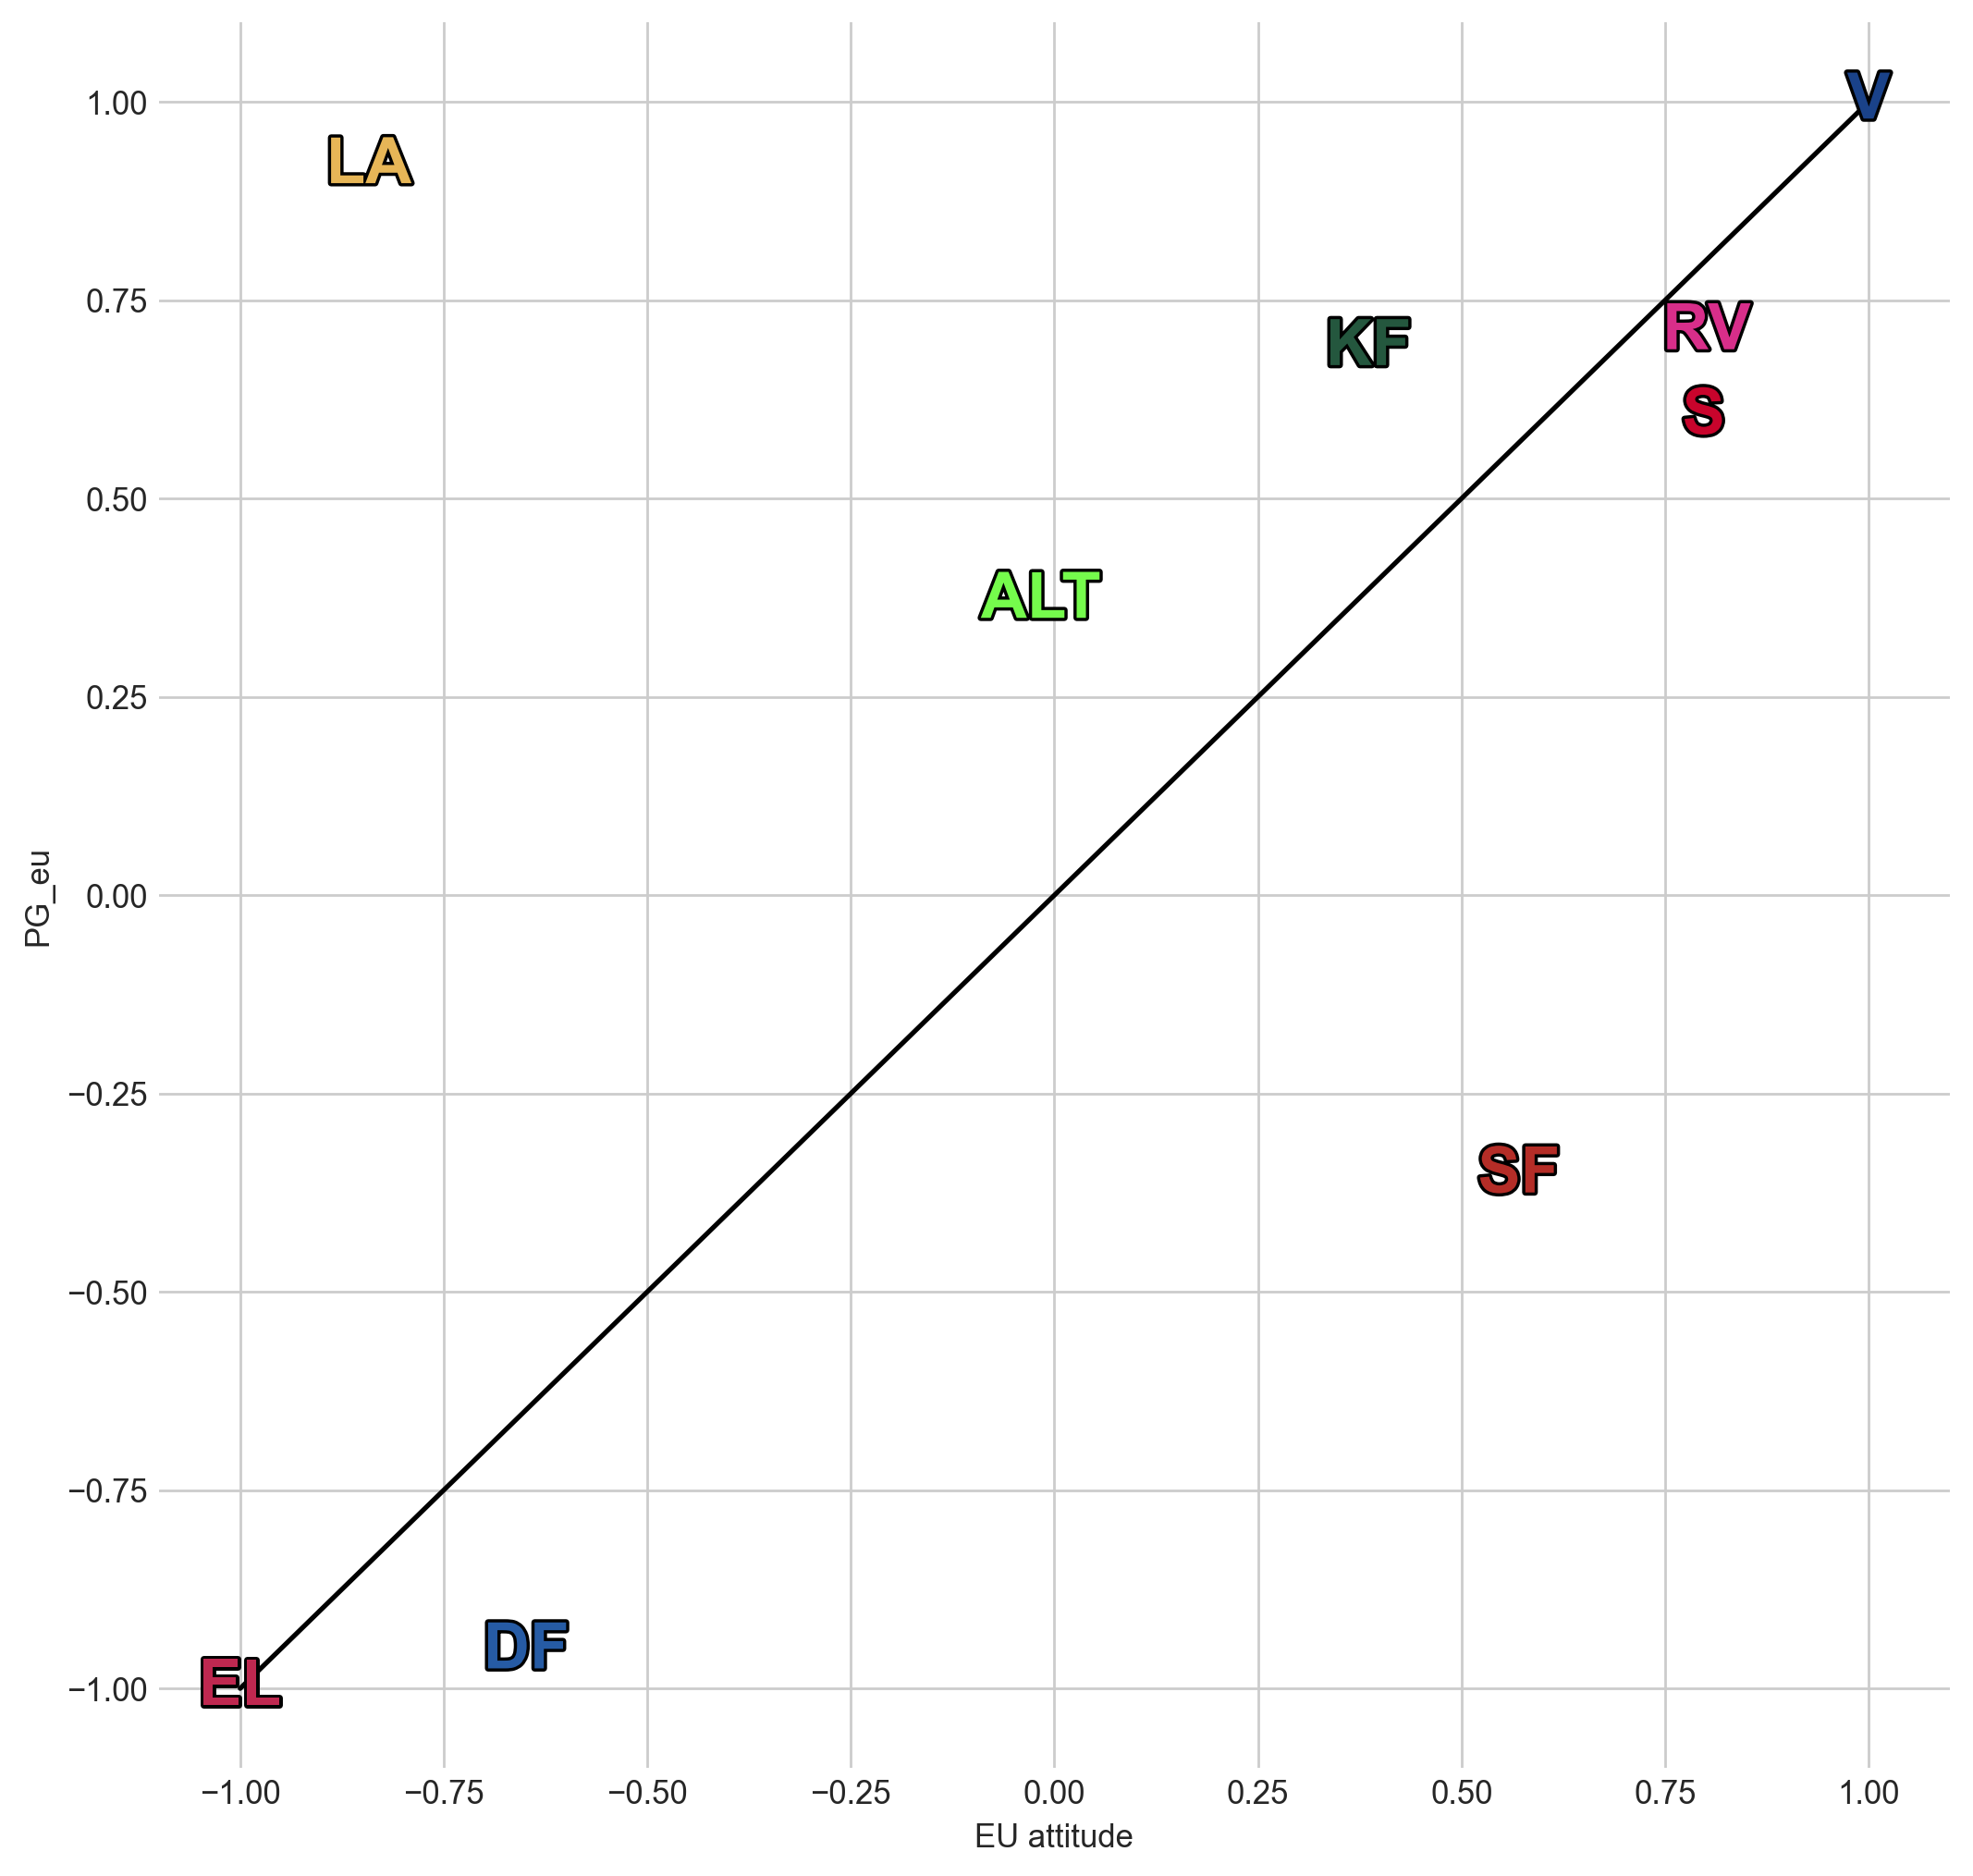

In [1872]:
# print pearson correlation between pos and comp_metric
from scipy.stats import pearsonr   
print(pearsonr(df_plot['pos'], df_plot[comp_metric]))

# create scatterplot of pos and comp_metric
plt.figure(figsize=(10, 10))
plt.scatter(df_plot['pos'], df_plot[comp_metric], color='none')
plt.xlabel('EU attitude')
plt.ylabel(comp_metric)

# add line from -1,-1 to 1,1
plt.plot([-1, 1], [-1, 1], 'black')

plt.box(False)

# add party labels
for i, txt in enumerate(df_plot['party']):
    plt.text(df_plot['pos'][i], df_plot[comp_metric][i], txt, ha='center', va='center', fontsize=20, color=df_plot['color'][i], weight='bold', path_effects=[pe.withStroke(linewidth=2, foreground='black')])

plt.show()

In [1873]:
df_scales = pd.read_pickle('validation/dr/df_scales.p')

In [1874]:
polvecs = pol2vec_model.document_vectors
polvecs.shape

(234, 300)

In [1875]:
# project polvecs onto EU dimension
proj_dim = np.dot(polvecs, eu_axis)
proj_dim.shape

(234,)

In [1876]:
eu_val = combined_hover.dropna()
eu_val['eu_att'] = proj_dim
eu_val.head()

/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


doc party                                            snippet    color  \
0  0.0    DF  jeg er lidt forvirret på et højere plan hvis j...  #265BA4   
1  1.0    LA  statsministeren sagde i tirsdags at det simpel...  #E7B657   
2  2.0     S  først og fremmest vil jeg sige tillykke med va...  #C8042C   
3  3.0    LA  først og fremmest skal man vel ønske færøerne ...  #E7B657   
4  4.0    RV  det var også godt der kom styr på vandet derop...  #D82E8A   

           full_name  rank    eu_att  
0    Alex Ahrendtsen  37.0  0.011865  
1    Alex Vanopslagh  13.0 -0.027736  
2    Anders Kronborg  55.0  0.008064  
3   Anders Samuelsen  13.0  0.004016  
4  Andreas Steenberg  15.0  0.026944

In [1877]:
eu_val_merged = eu_val.drop(columns=['color']).merge(df_scales, left_on='full_name', right_on='fullname', how='inner')

In [1878]:
eu_val_merged

doc party_x                                            snippet  \
0      0.0      DF  jeg er lidt forvirret på et højere plan hvis j...   
1      1.0      LA  statsministeren sagde i tirsdags at det simpel...   
2      2.0       S  først og fremmest vil jeg sige tillykke med va...   
3      4.0      RV  det var også godt der kom styr på vandet derop...   
4      5.0       S  er jo virkelig gode til flotte ord men jeg syn...   
..     ...     ...                                                ...   
139  223.0       S  ordføreren konstaterede jo lige før at han stå...   
140  225.0       V  lad mig starte med at sige at det vi diskutere...   
141  229.0     ALT  jeg vil gerne spørge ordføreren om han overhov...   
142  232.0       S  nu insisterer ordføreren meget på at man komme...   
143  233.0      RV  se det der blev sagt til sidst synes jeg var v...   

                 full_name  rank    eu_att               fullname party_y  \
0          Alex Ahrendtsen  37.0  0.011865        Alex Ahrendtsen      DF   
1          Alex Vanopslagh  13.0 -0.027736        Alex Vanopslagh      LA   
2          Anders Kronborg  55.0  0.008064        Anders Kronborg       S   
3        Andreas Steenberg  15.0  0.026944      Andreas Steenberg      RV   
4    Ane Halsboe-Jørgensen  55.0  0.045101  Ane Halsboe-Jørgensen       S   
..                     ...   ...       ...                    ...     ...   
139          Trine Bramsen  55.0  0.013079          Trine Bramsen       S   
140    Troels Lund Poulsen  47.0  0.007986    Troels Lund Poulsen       V   
141           Ulla Sandbæk  11.0  0.040317           Ulla Sandbæk     ALT   
142         Yildiz Akdogan  55.0  0.000774         Yildiz Akdogan       S   
143           Zenia Stampe  15.0 -0.036138           Zenia Stampe      RV   

     dk_out_eu  dk_up_def  dk_de_border  asyl_out_eu    color  index  
0          5.0        5.0           5.0          5.0  #265BA4   1.00  
1          2.0        5.0           1.0          4.0  #E7B657   0.25  
2          1.0        5.0           2.0          4.0  #C8042C   0.00  
3          1.0        4.0           1.0          1.0  #D82E8A   0.00  
4          1.0        5.0           4.0          5.0  #C8042C   0.00  
..         ...        ...           ...          ...      ...    ...  
139        1.0        5.0           4.0          5.0  #C8042C   0.00  
140        1.0        5.0           4.0          4.0  #1A4289   0.00  
141        1.0        4.0           1.0          1.0  #75FB4C   0.00  
142        1.0        4.0           2.0          2.0  #C8042C   0.00  
143        1.0        4.0           1.0          1.0  #D82E8A   0.00  

[144 rows x 14 columns]

In [1879]:
weight = parl_data['full_name'].value_counts(normalize=True)
eu_val_merged['weight'] = eu_val_merged['full_name'].map(weight)
eu_val_sub = eu_val_merged.loc[eu_val_merged['weight'] > 0]

In [1880]:
eu_val_sub['eu_index'] = (
    eu_val_sub['dk_out_eu'] #+
    #eu_val_sub['dk_de_border'] +
    #eu_val_sub['dk_up_def']
    ) / 1

# recscale eu_index to 0, 1
eu_val_sub['eu_att'] = (eu_val_sub['eu_att'] - np.min(eu_val_sub['eu_att'])) / (np.max(eu_val_sub['eu_att']) - np.min(eu_val_sub['eu_att']))

# recode eu_index so -1 is -1, and all others are 1
eu_val_sub['eu_index'] = eu_val_sub['eu_index'].apply(lambda x: 1 if x < 3 else 0)

In [1881]:
eu_val_sub['eu_index'].value_counts()

1    128
0     16
Name: eu_index, dtype: int64

## Candidate test validation (Politiken.dk)

In [1882]:
df_politiken = pd.read_pickle('validation/politiken/df_politiken.p')

In [1883]:
polvecs = pol2vec_model.document_vectors
polvecs.shape

(234, 300)

In [1884]:
# project polvecs onto EU dimension
proj_dim = np.dot(polvecs, eu_axis)
proj_dim.shape

(234,)

In [1885]:
eu_val = combined_hover.dropna()
eu_val['eu_att'] = proj_dim
eu_val['eu_att'] = rescale(eu_val['eu_att'])
eu_val.describe()

/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


doc        rank      eu_att
count  234.000000  234.000000  234.000000
mean   116.500000   34.029915   -0.036918
std     67.694165   17.411060    0.413137
min      0.000000    3.000000   -1.000000
25%     58.250000   16.000000   -0.318798
50%    116.500000   37.000000   -0.033592
75%    174.750000   47.000000    0.261996
max    233.000000   55.000000    1.000000

In [1886]:
eu_val_merged = eu_val.merge(df_politiken, left_on='full_name', right_on='fullname', how='inner')

In [1887]:
eu_val_merged = eu_val_merged.drop(columns=['color']).merge(df_scales, left_on='full_name', right_on='fullname', how='inner')

In [1888]:
# remove those with value 0 on dk_opt_out
eu_val_merged = eu_val_merged.loc[eu_val_merged['dk_opt_out'] != 0]
eu_val_merged = eu_val_merged.loc[eu_val_merged['dk_out_eu'] != 0]

In [1889]:
eu_val_merged.shape

(125, 36)

In [1890]:
eu_val_merged.head()

doc party_x                                            snippet  \
0  0.0      DF  jeg er lidt forvirret på et højere plan hvis j...   
1  1.0      LA  statsministeren sagde i tirsdags at det simpel...   
2  2.0       S  først og fremmest vil jeg sige tillykke med va...   
3  4.0      RV  det var også godt der kom styr på vandet derop...   
4  5.0       S  er jo virkelig gode til flotte ord men jeg syn...   

               full_name  rank    eu_att  CandidateID             fullname_x  \
0        Alex Ahrendtsen  37.0  0.237453         3946        Alex Ahrendtsen   
1        Alex Vanopslagh  13.0 -0.671142         3876        Alex Vanopslagh   
2        Anders Kronborg  55.0  0.150248         3476        Anders Kronborg   
3      Andreas Steenberg  15.0  0.583420         3683      Andreas Steenberg   
4  Ane Halsboe-Jørgensen  55.0  1.000000         3477  Ane Halsboe-Jørgensen   

   264  265  ...  282  283             fullname_y  party_y  dk_out_eu  \
0    5    1  ...    1    1        Alex Ahrendtsen       DF        5.0   
1    1    5  ...    1    2        Alex Vanopslagh       LA        2.0   
2    2    1  ...    3    4        Anders Kronborg        S        1.0   
3    4    2  ...    5    5      Andreas Steenberg       RV        1.0   
4    3    1  ...    3    4  Ane Halsboe-Jørgensen        S        1.0   

   dk_up_def  dk_de_border  asyl_out_eu    color  index  
0        5.0           5.0          5.0  #265BA4   1.00  
1        5.0           1.0          4.0  #E7B657   0.25  
2        5.0           2.0          4.0  #C8042C   0.00  
3        4.0           1.0          1.0  #D82E8A   0.00  
4        5.0           4.0          5.0  #C8042C   0.00  

[5 rows x 36 columns]

In [1891]:
# count number of times the strings 'eu' or 'union'  appear in snippet column
eu_val_merged['eu_count'] = eu_val_merged['snippet'].str.count('eu|union')

# Normalize eu_count col to between 0 and 1 (min value > 0, so not to mess with WLS log by dividing by zero)
eu_val_merged['eu_count'] = eu_val_merged['eu_count'] / eu_val_merged['eu_count'].max()

In [1892]:
eu_val_merged['eu_count'].describe()

count    125.000000
mean       0.089884
std        0.133765
min        0.003145
25%        0.019654
50%        0.047956
75%        0.106132
max        1.000000
Name: eu_count, dtype: float64

In [1893]:
# Potential weighting according to number of utterances
weight = parl_data['full_name'].value_counts()
eu_val_merged['weight'] = eu_val_merged['full_name'].map(weight)
eu_val_merged['weight'] = eu_val_merged['weight'] / eu_val_merged['weight'].sum()
eu_val_sub = eu_val_merged.loc[eu_val_merged['weight'] > 0]

In [1894]:
eu_val_sub['eu_count'].describe()

count    125.000000
mean       0.089884
std        0.133765
min        0.003145
25%        0.019654
50%        0.047956
75%        0.106132
max        1.000000
Name: eu_count, dtype: float64

In [1895]:
# Rescale eu_att and dk_opt_out to between -1, 1
eu_val_sub['dk_out_eu'] = rescale(eu_val_sub['dk_out_eu'])
eu_val_sub['dk_opt_out'] = rescale(eu_val_sub['dk_opt_out'])

print(eu_val_sub['dk_out_eu'].describe())
print(eu_val_sub['dk_opt_out'].describe())

count    125.00000
mean      -0.74000
std        0.56297
min       -1.00000
25%       -1.00000
50%       -1.00000
75%       -1.00000
max        1.00000
Name: dk_out_eu, dtype: float64
count    125.000000
mean       0.184000
std        0.670628
min       -1.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: dk_opt_out, dtype: float64


In [1896]:
# create scale of dk_opt_out and dk_out_eu
eu_val_sub['eu_index'] = (
    eu_val_sub['dk_opt_out'] #+
    #eu_val_sub['dk_out_eu']
) / 1

# reverse scale
eu_val_sub['eu_index'] = eu_val_sub['eu_index'].apply(lambda x: -x)

In [1897]:
eu_val_sub['eu_index'].describe()

count    125.000000
mean      -0.184000
std        0.670628
min       -1.000000
25%       -1.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: eu_index, dtype: float64

In [1898]:
# pearson correaltion between eu_val_sub['dk_opt_out'] and eu_val_sub['dk_out_eu']
from scipy.stats import pearsonr
pearsonr(eu_val_sub['dk_opt_out'], eu_val_sub['dk_out_eu'])

(0.5130789449406572, 9.481348476793893e-10)

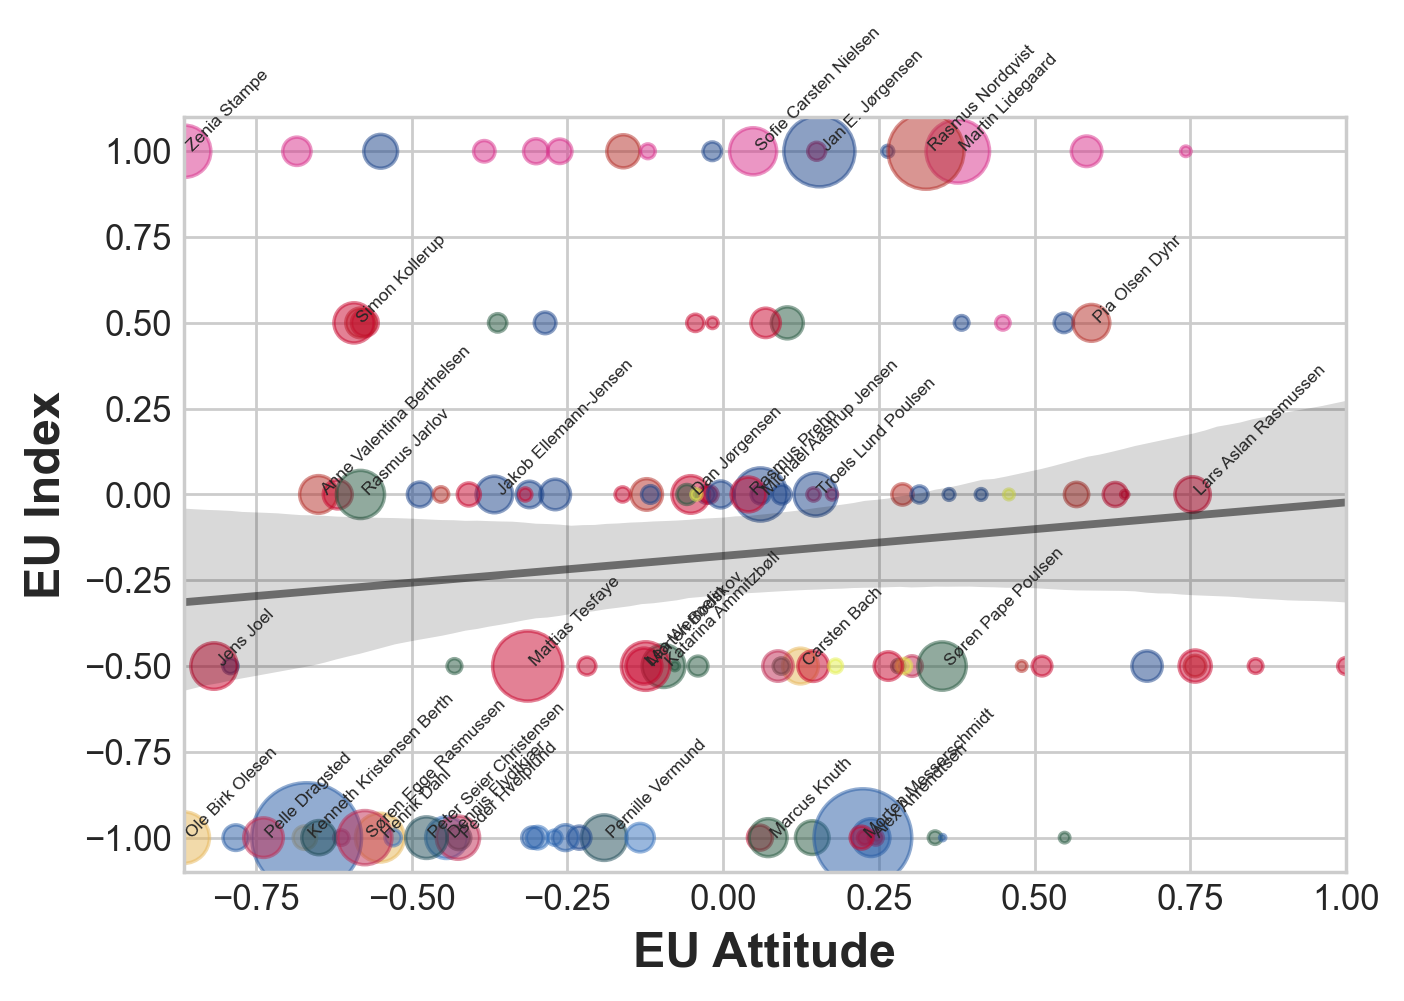

In [1899]:
# scatterplot eu_att vs dk_opt_out using plt
plt.scatter(eu_val_sub['eu_att'], eu_val_sub['eu_index'], alpha=.5, color=eu_val_sub['color'], s=(eu_val_sub['eu_count']*1000))

# add regression line
sns.regplot(x='eu_att', y='eu_index', data=eu_val_sub, scatter=False, color='black', line_kws={'alpha':.5})

# plot full_name if eu_count > 0.5
for i, txt in enumerate(eu_val_sub['full_name']):
    if eu_val_sub['eu_count'].iloc[i] > 0.1:
        plt.annotate(txt, (eu_val_sub['eu_att'].iloc[i], eu_val_sub['eu_index'].iloc[i]), fontsize=5, rotation=45)

# Add axis labs
plt.xlabel('EU Attitude', fontsize=14, weight='bold')
plt.ylabel('EU Index', fontsize=14, weight='bold')

plt.show()

In [1900]:
eu_val_sub['eu_att'].describe()

count    125.000000
mean      -0.031728
std        0.427025
min       -0.865669
25%       -0.361758
50%       -0.021858
75%        0.265300
max        1.000000
Name: eu_att, dtype: float64

In [1901]:
# run weighted least squares regression
import statsmodels.api as sm
X = rescale(eu_val_sub['eu_att'])
y = -eu_val_sub['dk_opt_out']
X = sm.add_constant(X)
model = sm.WLS(y, X, weights=eu_val_sub['eu_count']).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:             dk_opt_out   R-squared:                       0.083
Model:                            WLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     11.08
Date:                Tue, 09 May 2023   Prob (F-statistic):            0.00115
Time:                        09:29:02   Log-Likelihood:                -176.12
No. Observations:                 125   AIC:                             356.2
Df Residuals:                     123   BIC:                             361.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1361      0.073     -1.867      0.0